Step 1/50
Step 2/50
Step 3/50
Step 4/50
Step 5/50
Step 6/50
Step 7/50
Step 8/50
Step 9/50
Step 10/50
Step 11/50
Step 12/50
Step 13/50
Step 14/50
Step 15/50
Step 16/50
Step 17/50
Step 18/50
Step 19/50
Step 20/50
Step 21/50
Step 22/50
Step 23/50
Step 24/50
Step 25/50
Step 26/50
Step 27/50
Step 28/50
Step 29/50
Step 30/50
Step 31/50
Step 32/50
Step 33/50
Step 34/50
Episode ended with reward: 0.0
Step 35/50
Step 36/50
Step 37/50
Step 38/50
Step 39/50
Step 40/50
Step 41/50
Step 42/50
Step 43/50
Step 44/50
Step 45/50
Step 46/50
Step 47/50
Step 48/50
Step 49/50
Step 50/50


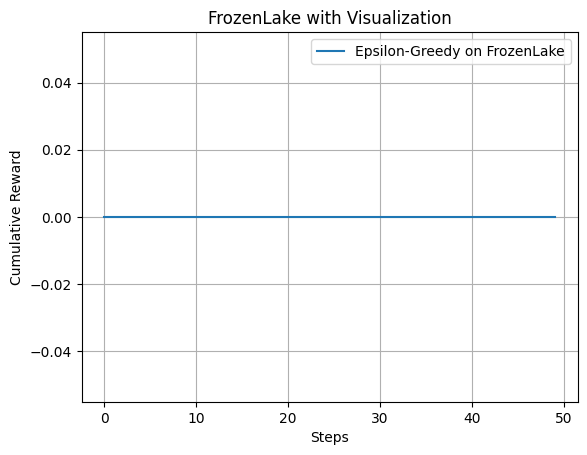

In [3]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import time

def epsilon_greedy_frozenlake_visualized(env, num_steps, epsilon=0.1):
    Q = np.zeros(env.action_space.n)  # Action-value estimates
    N = np.zeros(env.action_space.n)  # Action counts
    rewards = []

    state, _ = env.reset()  # Initialize the environment
    env.render()  # Render the initial state
    time.sleep(1)  # Pause for visualization

    for step in range(num_steps):
        print(f"Step {step + 1}/{num_steps}")
        # Choose an action
        if np.random.rand() < epsilon:
            action = np.random.choice(env.action_space.n)  # Explore
        else:
            action = np.argmax(Q)  # Exploit

        # Take a step
        next_state, reward, terminated, truncated, _ = env.step(action)
        rewards.append(reward)

        # Update action-value estimates
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]

        # Visualize the environment after the action
        env.render()
        time.sleep(0.5)  # Pause for visualization

        # Check if the episode is over
        if terminated or truncated:
            print(f"Episode ended with reward: {reward}")
            state, _ = env.reset()
            env.render()
            time.sleep(1)  # Pause for visualization
        else:
            state = next_state

    return np.cumsum(rewards)

# Set up FrozenLake with deterministic behavior
env = gym.make("FrozenLake-v1", render_mode="human", map_name="4x4", is_slippery=False)  # Disable randomness
num_steps = 50  # Limit steps for visualization
epsilon = 0.1

# Run epsilon-greedy with visualization
cumulative_rewards = epsilon_greedy_frozenlake_visualized(env, num_steps, epsilon)

# Plot cumulative rewards
plt.plot(cumulative_rewards, label="Epsilon-Greedy on FrozenLake")
plt.xlabel("Steps")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid()
plt.title("FrozenLake with Visualization")
plt.show()

env.close()  # Close the environment when done


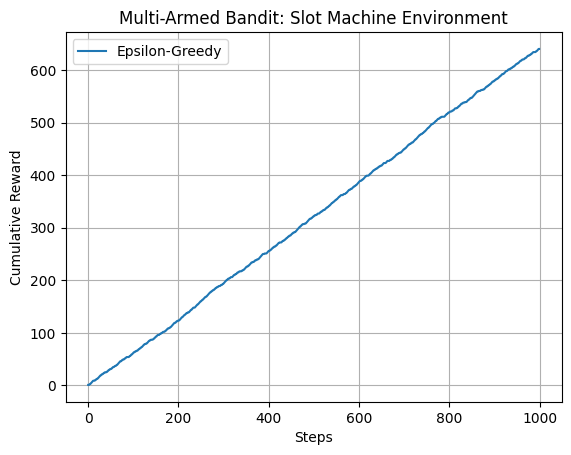

True probabilities: [0.64036308 0.29239426 0.54593766 0.06015107 0.46948596]
Estimated probabilities: [0.66041896 0.5        0.66666667 0.         0.5       ]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

class SlotMachineEnvironment:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.true_probabilities = np.random.rand(n_arms)  # Random win probabilities for each arm

    def pull(self, arm):
        # Reward is 1 with the probability of the chosen arm, else 0
        return 1 if np.random.rand() < self.true_probabilities[arm] else 0

def epsilon_greedy_bandit(env, num_steps, epsilon=0.1):
    n_arms = env.n_arms
    Q = np.zeros(n_arms)  # Action-value estimates
    N = np.zeros(n_arms)  # Action counts
    rewards = []

    for _ in range(num_steps):
        # Choose action
        if np.random.rand() < epsilon:
            action = np.random.choice(n_arms)  # Explore
        else:
            action = np.argmax(Q)  # Exploit

        # Get reward
        reward = env.pull(action)
        rewards.append(reward)

        # Update action-value estimates
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]

    return np.cumsum(rewards), Q

# Create the slot machine environment
n_arms = 5  # Number of slot machines
env = SlotMachineEnvironment(n_arms)

# Parameters for epsilon-greedy
num_steps = 1000
epsilon = 0.1

# Run the epsilon-greedy algorithm
cumulative_rewards, estimated_Q = epsilon_greedy_bandit(env, num_steps, epsilon)

# Plot cumulative rewards
plt.plot(cumulative_rewards, label="Epsilon-Greedy")
plt.xlabel("Steps")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid()
plt.title("Multi-Armed Bandit: Slot Machine Environment")
plt.show()

# Print the results
print("True probabilities:", env.true_probabilities)
print("Estimated probabilities:", estimated_Q)
